In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from Bio import Phylo

In [2]:
genes = []
mutation_rate = 0.1

In [3]:
fitness_df = pd.read_csv("fitness.csv")

In [4]:
data = ""
with open("./Refs/mp.txt", 'r') as file:
    data = file.read()

terms = data.strip().split("[Term]\n")
arr = []
for term in terms:
    if term:
        lines = term.strip().split("\n")
        term_data = {
            "id": "",
        }
    
        for line in lines:
            if line:
                if ":" in line:
                    key, value = line.split(":", 1)
                    key = key.strip().lower()
                    if key == "id":
                        term_data["id"] = value.strip()
            arr.append(term_data)
    df = pd.DataFrame(arr)

In [5]:
df = df["id"].unique()

In [6]:
fitness_scores = []
for i in range(len(fitness_df)):
    for j in range(len(df)):
        if fitness_df["id"][i] == df[j]:
            fitness_scores.append(fitness_df["fitness_score"][i])

In [7]:
df = pd.DataFrame([{"id": id, "fitness": fitness} for id, fitness in zip(df, fitness_scores)])

In [8]:
df

,id,fitness
0,MP:0004738,-6
1,MP:0002638,0
2,MP:0000376,0
3,MP:0003449,-6
4,MP:0000410,-6
5,MP:0000923,-1
6,MP:0001713,-6
7,MP:0002276,-2
8,MP:0001191,1
9,MP:0000130,-6


In [9]:
G = nx.Graph()
G.add_nodes_from([f"'id': {id}, 'fitness': {fitness}" for id, fitness in zip(df["id"], df["fitness"])])

In [10]:
class Rat:
    def __init__(self, mps, fitness):
        self.id = random.randint(0, 10)
        self.mps = mps
        self.fitness = fitness
    
    def show(self):
        return f"(fitness:{self.fitness})"
    
    def select_random_gene(self):
        return random.choice(self.mps)
    
    def __str__(self):
        return f"{self.id} - {self.fitness}"

In [11]:
rats = []
sample_gene = [{'id': id, 'fitness': fitness} for id, fitness in zip(df["id"], df["fitness"])]
for _ in range(5):
    s = []
    for _ in range(2):
        n = random.randint(0, len(sample_gene) - 1)
        s.append(sample_gene[n])
        sample_gene.remove(sample_gene[n])
    
    rats.append(Rat(list(map(lambda sq: sq["id"], s)), sum(list(map(lambda sq: sq["fitness"], s)))))

In [12]:
list(map(lambda r: r.mps, rats))

[['MP:0000410', 'MP:0000130'],
 ['MP:0002276', 'MP:0003449'],
 ['MP:0002638', 'MP:0001713'],
 ['MP:0004738', 'MP:0001191'],
 ['MP:0000376', 'MP:0000923']]

In [13]:
def breed(rat1, rat2):
    genes = [rat1.select_random_gene(), rat2.select_random_gene()]
    fit = 0
    for i in genes:
        for j in range(len(df)):
            if df["id"][j] == i:
                fit += int(df["fitness"][j])
    return Rat(genes, fit)

In [14]:
G = nx.DiGraph()

In [30]:
tree = [breed(random.choice(rats), random.choice(rats)), breed(random.choice(rats), random.choice(rats))]
edges = []
a, b = 0, 1
for gen in range(100):
    b = random.randint(5, 20)
    for r in range(b):
        f = random.choice(tree)
        m = random.choice(tree)
        child = breed(f, m)
        tree.append(child)
        edges.append((f, child))
        edges.append((m, child))

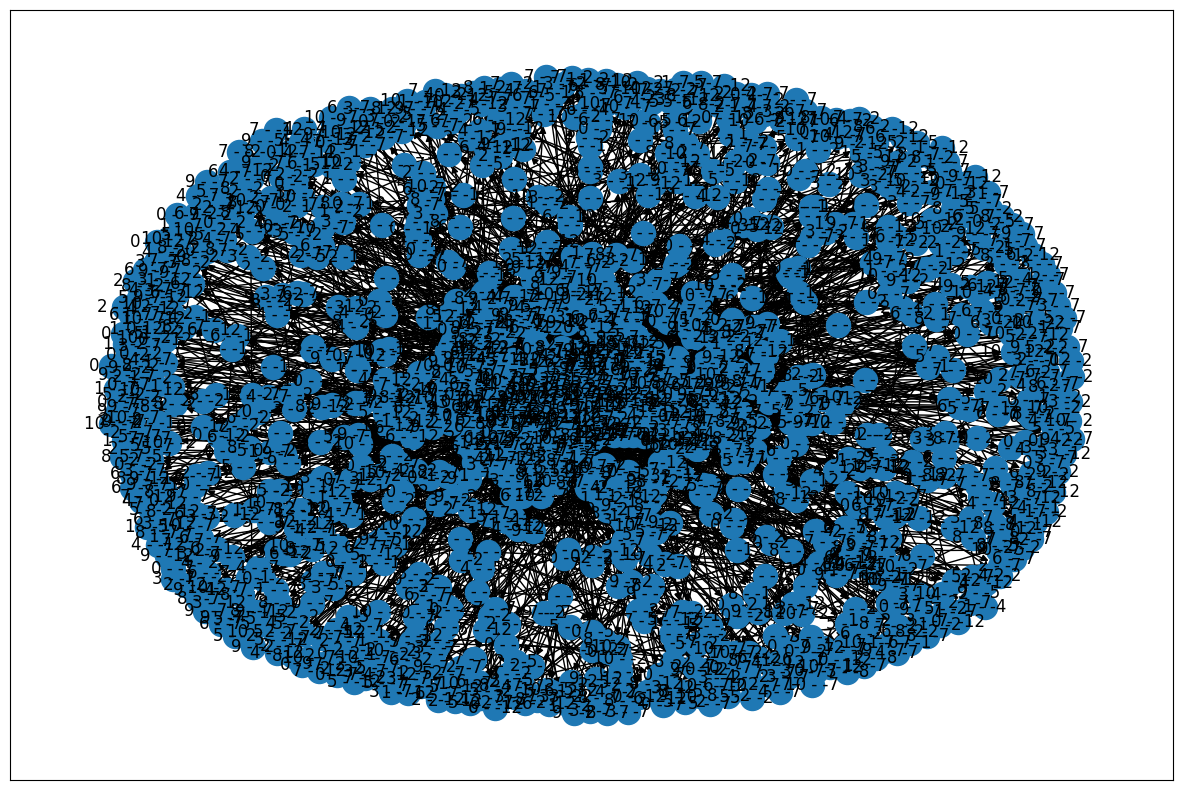

In [39]:
plt.figure(figsize=(15, 10))
G.add_nodes_from(tree)
G.add_edges_from(edges)

nx.draw_networkx(G)
plt.show()

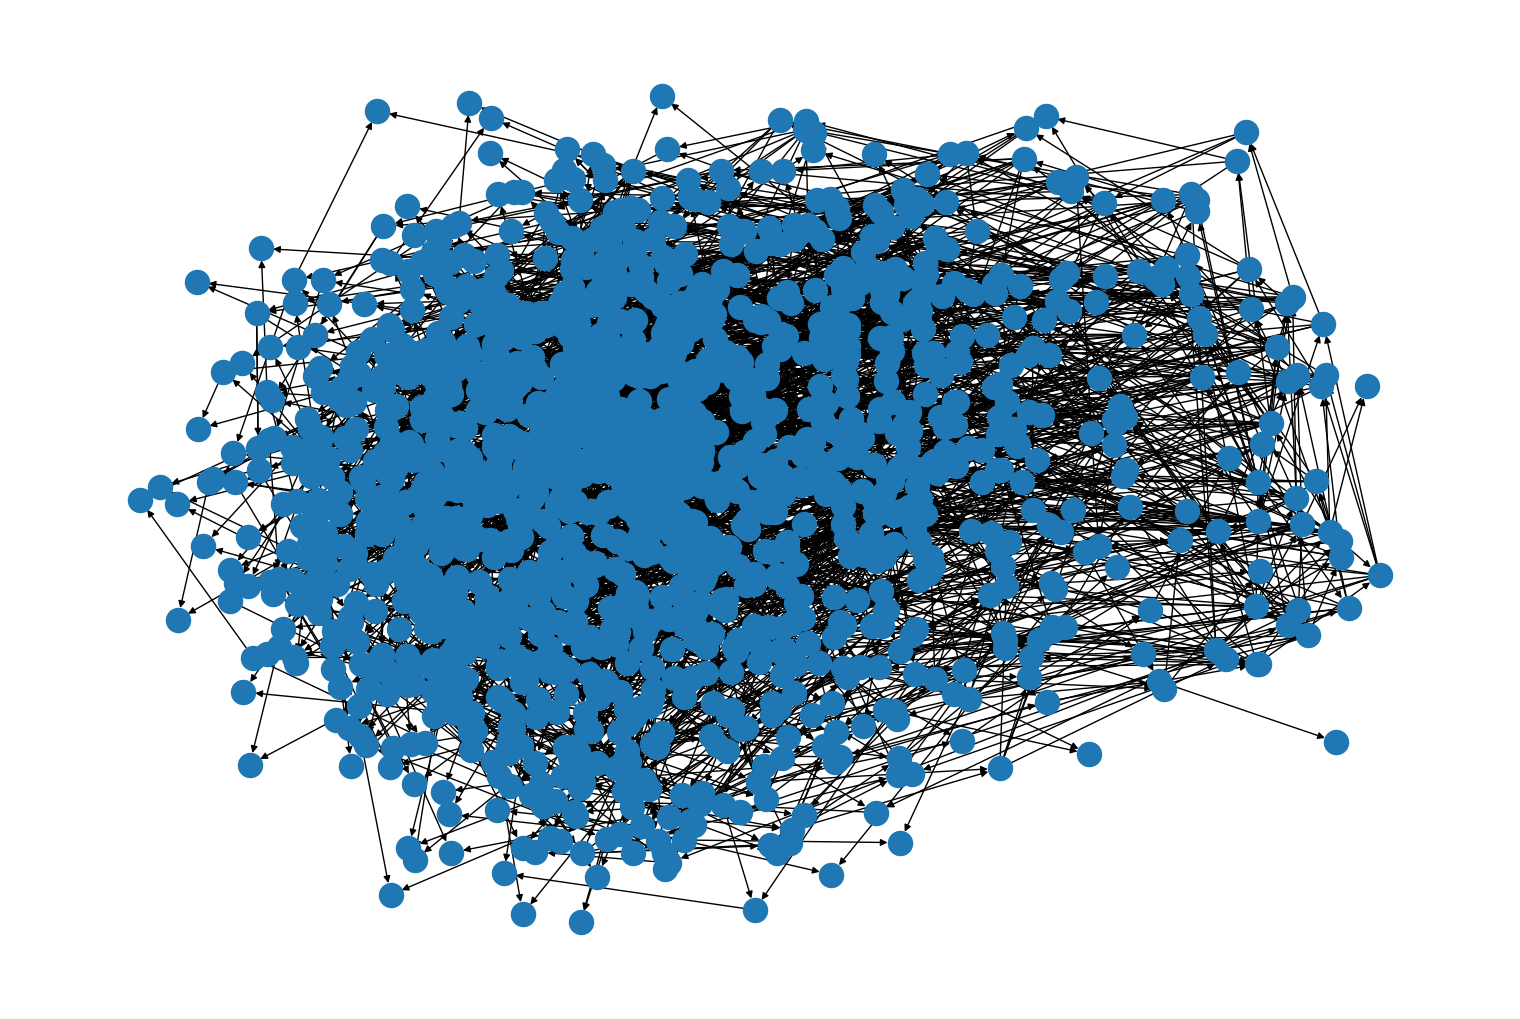

In [40]:
plt.figure(figsize=(15, 10))
G.add_nodes_from(tree)
G.add_edges_from(edges)

nx.draw_kamada_kawai(G)
plt.show()